## Breast Cancer Prediction
Breast cancer is one of the most common types of cancer in the UK. According to NHS, about 1 in 8 women are diagnosed with breast cancer during their lifetime, and early detection will significantly increase the chance of recovery.
​
Your client is a medical research company, and you are asked to improve the early detection of breast cancer using machine learning. The goal of the project is to train a machine learning model which predicts whether the cancer is benign or malignant.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.


### Data exploration and visualisation
- Import the data and familiarise yourself with it. You might want to understand things like:
   - What is the data size?
   - How many attributes are there?
   - What's the type of each attribute (integer, boolean, string etc)?
   - Check missing values, null?
   - Any outliers or anomalies? What should you do with it?
   

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.cluster as clust
from scipy.spatial.distance import cdist
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
import os


#### Import core python libraries
import pandas as pd
import pickle
import os
import numpy as np
from IPython.display import Math
from itertools import product

#### Import machine learning and stats libraries
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (auc, confusion_matrix, roc_curve, 
                             accuracy_score, precision_score, make_scorer)


import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append("breastcancerprediction/models/")

from functions import *

In [2]:
# Read the data from the 'data' folder
df_raw = pd.read_csv("../data/raw/data.csv", sep = ",")

In [3]:
df_raw.head(5)
df_raw.shape



(569, 33)

In [4]:
df_raw.get_dtype_counts()

float64    31
int64       1
object      1
dtype: int64

In [5]:
df_raw.info()
#ID coded as int and diagnosis coded as object
#The raw dataset has 569 rows and 33 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

Dropping empty column Unnamed: 32

In [6]:
df = df_raw.drop(['Unnamed: 32','id'], axis =1)

In [7]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Area mean looks very high compared to other values

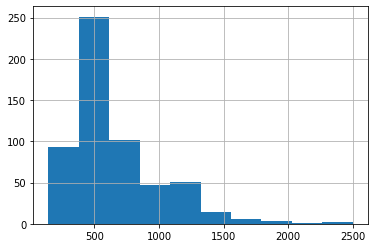

In [8]:
df["area_mean"].hist()

In [9]:
#Checking for missing values

print(df.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


   
​
- Visualise some of the features to get more insight. You might want to find out things like:
   - How many patients are diagnosed as malignant or benign?
   - How about the distribution of features you are interested in?
   - Correlation between attributes?
​
- When visualising the data, think of which type of visualisation is the most suitable for your analysis, and why.
​


Inspecting class distribution of diagnosis variable

In [10]:
df['diagnosis'].value_counts()/len(df['diagnosis'])

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [11]:
# Scale numeric variables
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
df.loc[:, numeric_cols] = scaler.fit_transform(df.loc[:, numeric_cols])

In [12]:
#Recoding diagnosis to 1 for malignant and 0 for benign
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})

Recoding target variable to boolean

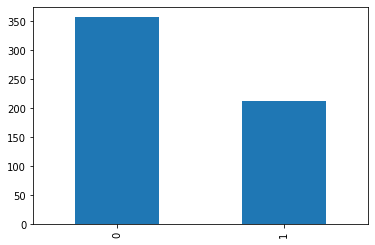

In [13]:
df['diagnosis'].value_counts().plot(kind='bar')

Correlation

SOme variables are highly correlated and so we will calculate VIF (Variance Inflation Factor) to systematically remove highly correlated variables and reduce multicollinearity

In [14]:
#df1 = df.drop(['diagnosis'], axis =1)

In [15]:
  def calculate_vif(X, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return list(X)
    
calculate_vif(df)

Dropping radius_mean with vif=3809.1842397732003
Dropping radius_worst with vif=619.4796751870575
Dropping perimeter_mean with vif=326.19611094259386
Dropping perimeter_worst with vif=124.49271907605285
Dropping concavity_mean with vif=64.702700407554
Dropping radius_se with vif=36.136346909636465
Dropping compactness_worst with vif=33.967293831011126
Dropping concave points_worst with vif=30.615185026735304
Dropping area_mean with vif=25.393732873969913
Dropping compactness_mean with vif=18.896294600943342
Dropping texture_worst with vif=17.24568867082471
Dropping area_se with vif=16.421961176265977
Dropping concavity_worst with vif=15.572569154638128
Dropping concave points_mean with vif=9.254923856181517
Dropping fractal_dimension_worst with vif=8.52834507444558
Dropping smoothness_worst with vif=7.551126296320689
Dropping compactness_se with vif=5.134587928441702
Dropping area_worst with vif=5.049127377410778


['diagnosis',
 'texture_mean',
 'smoothness_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'texture_se',
 'perimeter_se',
 'smoothness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'symmetry_worst']

In order to select independent variables predictive of the diagnosis status we calculate variance inflation factor between each pair of variables and drop one that is highly correlated. The calculate_vif() function returns the names of predictors with VIF < 5.

Final dataset includes texture_mean, smoothness_mean, symmetry_mean, fractal_dimension_mean, texture_se, perimeter_se,
 smoothness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, symmetry_worst anddiagnosis.

In [16]:
final_df = df[calculate_vif(df)]

Dropping radius_mean with vif=3809.1842397732003
Dropping radius_worst with vif=619.4796751870575
Dropping perimeter_mean with vif=326.19611094259386
Dropping perimeter_worst with vif=124.49271907605285
Dropping concavity_mean with vif=64.702700407554
Dropping radius_se with vif=36.136346909636465
Dropping compactness_worst with vif=33.967293831011126
Dropping concave points_worst with vif=30.615185026735304
Dropping area_mean with vif=25.393732873969913
Dropping compactness_mean with vif=18.896294600943342
Dropping texture_worst with vif=17.24568867082471
Dropping area_se with vif=16.421961176265977
Dropping concavity_worst with vif=15.572569154638128
Dropping concave points_mean with vif=9.254923856181517
Dropping fractal_dimension_worst with vif=8.52834507444558
Dropping smoothness_worst with vif=7.551126296320689
Dropping compactness_se with vif=5.134587928441702
Dropping area_worst with vif=5.049127377410778


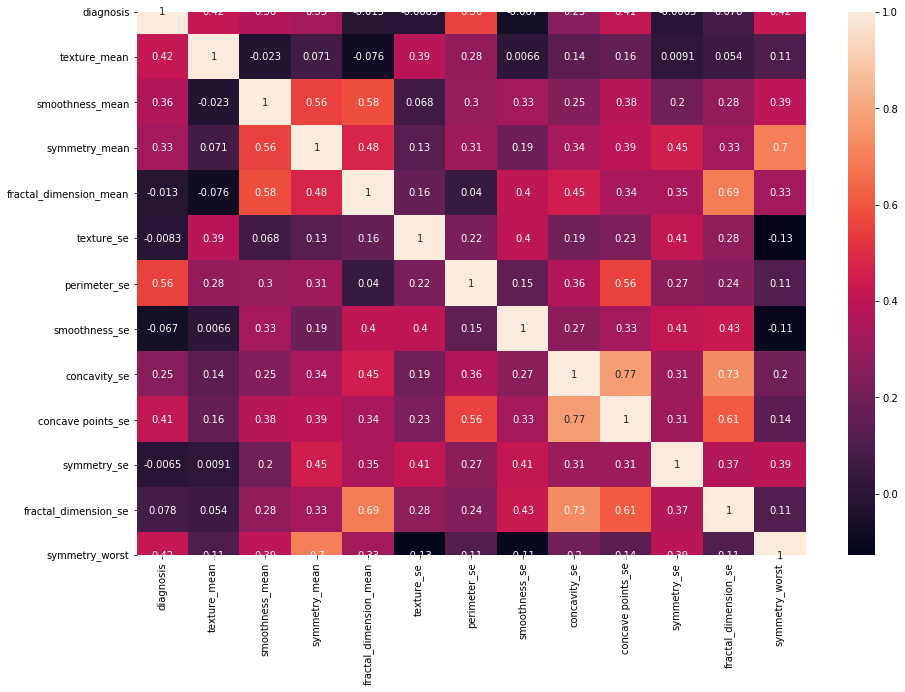

In [17]:
plt.figure(figsize = (15,10))
correlation_matrix = final_df.corr()
sns.heatmap(data = correlation_matrix, annot = True)

In [18]:
#sns.pairplot(final_df)

 If one of the individual scatterplots in the matrix shows a linear relationship between variables, this is an indication that those variables are exhibiting multicollinearity.

### Feature and model selection
- Is it a classification or regression problem? 

Classification, predict malignant vs benign tumour

- What is the target attribute?

1) ID number
2) Diagnosis (M = malignant, B = benign)



- Do you want to perform any feature engineering?

The raw data was generated from 10 original variables.

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry
	j) fractal dimension ("coastline approximation" - 1)

Several of the papers listed above contain detailed descriptions of
how these features are computed.

The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.


- Which features you want to use and why?

- Can any of the variables be transformed to make more useful features?
- What kind of machine learning algorithm is appropriate, and why?

Logistic regression, Decision tree, Random forest, SVM

- You should not just explore one algorithm, but look at several algorithms and compare them (you are learning data science now!)
- Any tradeoff among the algorithms you choose? Pros and cons?
​
### Data preprocessing
- How do you clean the data?
- Do you need to do any imputation?
- Do you need to remove outliers?
- How do you create a new feature?
- How do you split the data into training validation and testing data, and what ratio?
​
### Model training and evaluation
- Which parameters do you need to use?
- Which metrics do you want to optimise for?
- How do you validate your model?
- What worked and what did not work? It's also a good idea to mention what did not work and how you improved it.
- How do you test the performance of your model?
- How can you boost the performance of your model (e.g. fine tune the hyperparameters of your model or use an ensemble method)?
- What is the limitation of your analysis?
​
### Presentation and communication
- What are the most important things you want to present to your client?
- How do you structure the flow of your presentation?
- How do you translate your analysis into business insight?
- What could be done in  further analysis/research?

In [19]:
# Splitting the data into training and testing sets - a frequent test set size is 20%-30% of the original dataset

target = final_df['diagnosis']
one_hot_df_indep = final_df.drop('diagnosis', axis=1)

X = one_hot_df_indep.values

X_train, X_test, y_train, y_test  = train_test_split(X, target, test_size = 0.2, random_state = 33)

In [20]:
print(" X_train: {}\n X_test: {}\n y_train: {}\n y_test: {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

 X_train: (455, 12)
 X_test: (114, 12)
 y_train: (455,)
 y_test: (114,)


In [21]:
# And a logistic regression, so we can investigate ROC and AUC
clf_logit = LogisticRegression()
clf_logit.fit(X_train, y_train)
pred_clf_logit = clf_logit.predict(X_test)
proba_clf_logit = clf_logit.predict_proba(X_test)

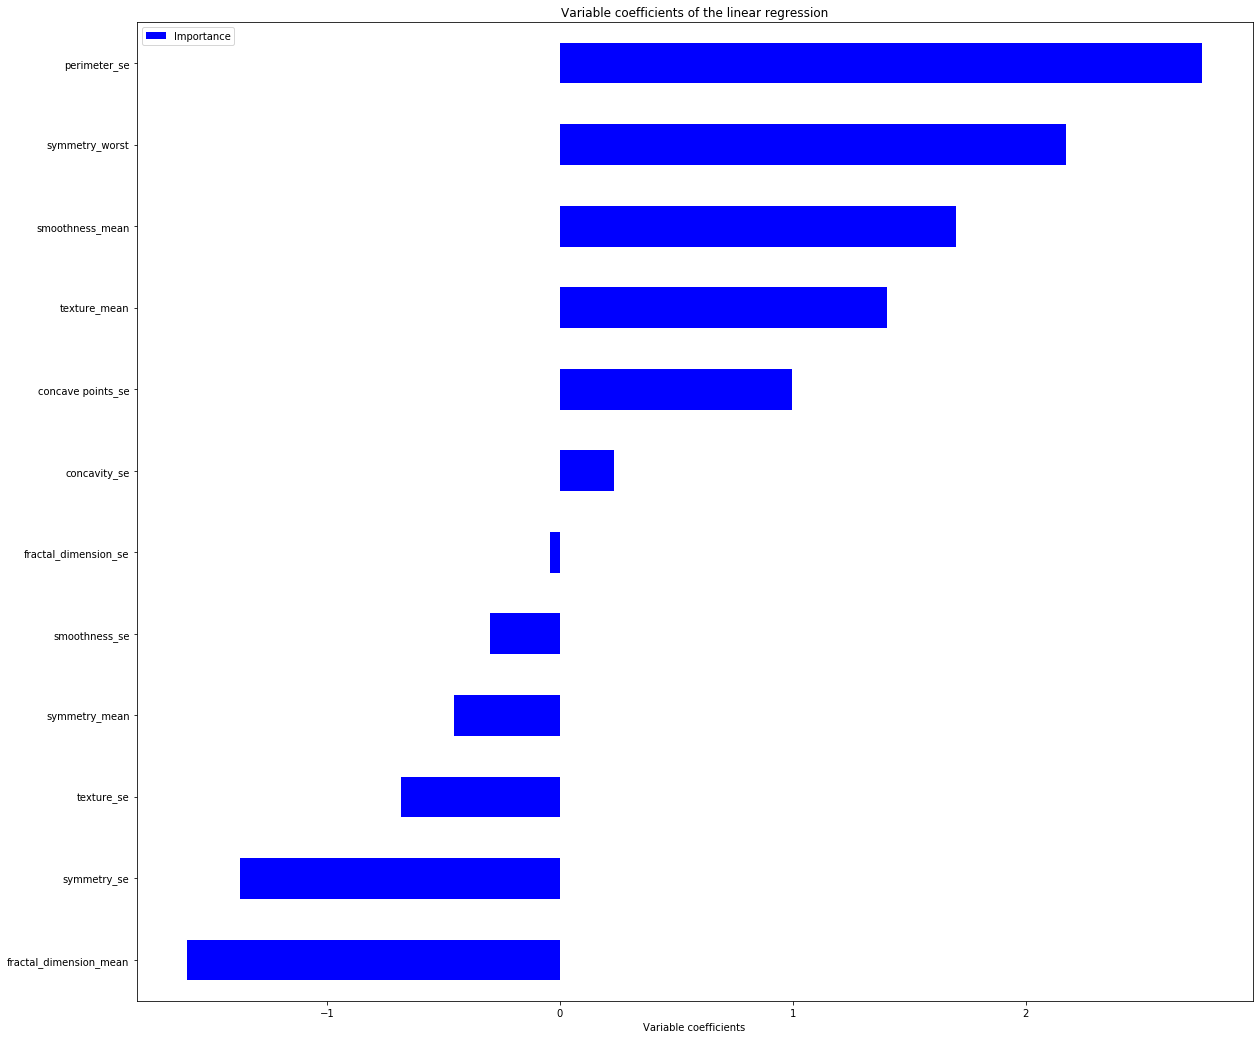

In [22]:
# Plot feature importance
coefs = pd.DataFrame(clf_logit.coef_.reshape((12, 1)), 
                         index = one_hot_df_indep.columns.tolist(), columns = ['Importance'])
coefs = coefs.sort_values(by='Importance', ascending=True)
coefs.plot(kind='barh', figsize=(20,18), color = 'blue')
plt.xlabel('Variable coefficients')
plt.title('Variable coefficients of the linear regression')
plt.show()

In [23]:
print(proba_clf_logit)

[[1.02586213e-01 8.97413787e-01]
 [9.89532066e-01 1.04679336e-02]
 [9.35079265e-01 6.49207348e-02]
 [9.45414848e-01 5.45851520e-02]
 [9.30889757e-01 6.91102426e-02]
 [9.79696593e-01 2.03034073e-02]
 [9.99483325e-01 5.16674884e-04]
 [9.98823940e-01 1.17605985e-03]
 [9.94235783e-01 5.76421662e-03]
 [9.97476038e-01 2.52396218e-03]
 [9.99083838e-01 9.16161862e-04]
 [1.53078764e-02 9.84692124e-01]
 [9.98372219e-01 1.62778124e-03]
 [6.07638591e-02 9.39236141e-01]
 [8.21759886e-01 1.78240114e-01]
 [3.57940838e-02 9.64205916e-01]
 [8.41125390e-01 1.58874610e-01]
 [6.96200688e-01 3.03799312e-01]
 [9.90581283e-01 9.41871706e-03]
 [9.94681501e-01 5.31849863e-03]
 [2.31051970e-01 7.68948030e-01]
 [9.99954485e-01 4.55153420e-05]
 [9.99218447e-01 7.81552742e-04]
 [9.79578555e-01 2.04214448e-02]
 [2.66577495e-02 9.73342250e-01]
 [1.67432873e-02 9.83256713e-01]
 [2.85278331e-02 9.71472167e-01]
 [7.51454791e-01 2.48545209e-01]
 [1.06951314e-01 8.93048686e-01]
 [9.97543696e-01 2.45630351e-03]
 [9.333937

In [24]:
thres = 0.5
target_predict_logit = np.where(proba_clf_logit[:,1] > thres, 1, 0)# How many actual "positive" (malignant) cases do we have in our train/test dataset? 
target_actual = y_test

#final_df['diagnosis'].value_counts() 
# What % of each dataset does it make up?

train_pos_count = y_train.sum()
test_pos_count = y_test.sum()



In [25]:
# How many "positive" (e.g., >50k) cases do we predict with the logistic regression?

logit_pos_count = target_predict_logit.sum()
print('% positive in logistic predictions (count/total): {:.2f}% ({}/{})'
      .format(logit_pos_count * 100.0 / len(y_test), logit_pos_count, len(y_test)))

% positive in logistic predictions (count/total): 35.96% (41/114)


Confusion matrix, without normalization
[[70  1]
 [ 3 40]]
Normalized confusion matrix
[[98.5915493   1.4084507 ]
 [ 6.97674419 93.02325581]]


<Figure size 432x288 with 0 Axes>

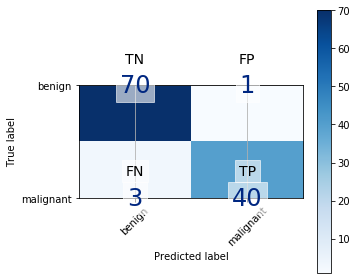

<Figure size 432x288 with 0 Axes>

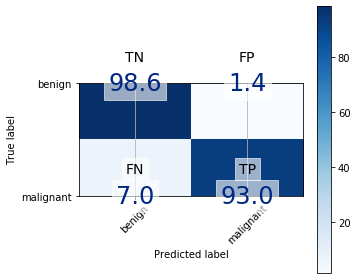

<Figure size 432x288 with 0 Axes>

In [26]:
class_names = ['benign', 'malignant']
fontsize=24
figsize=(5,4)

# Plot the confusion matrix of the logistic regression
logit_cfn = confusion_matrix(target_actual, target_predict_logit)
log_tn, log_fn, log_fp, log_tp = confusion_matrix(target_actual, target_predict_logit).ravel()


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(logit_cfn, classes=class_names, 
                      normalize=False, figsize=figsize, fontsize=fontsize)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(logit_cfn, classes=class_names, 
                      normalize=True, figsize=figsize, fontsize=fontsize)

plt.show()
plt.tight_layout()

In [27]:
log_acc = round((log_tp + log_tn) / X_test.shape[0], 3) * 100
print('Logistic regression accuracy: {:.2f}%'.format(log_acc))

log_precision = round((log_tp / (log_tp + log_fp)), 2) * 100
print('Logistic regression precision: {:.2f}%'.format(log_precision))

Logistic regression accuracy: 96.50%
Logistic regression precision: 93.00%


In [28]:
## Tune Logistic Regression
random_state = 33
cv=5


## Tune Logistic Regression
clf_log = LogisticRegression(random_state=random_state)

log_params={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
log_grid = GridSearchCV(clf_log, log_params, cv=cv);
log_grid.fit(X_train, y_train);





In [29]:
log_pred = log_grid.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(target_actual, log_pred)

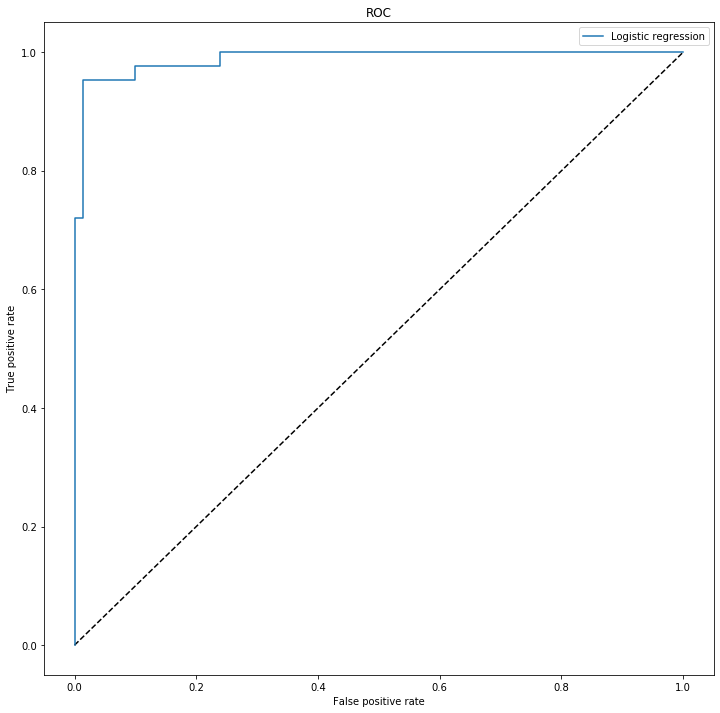

In [30]:
# Plot the ROC curve
fig = plt.figure(figsize=(12,12))
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_log, tpr_log, label='Logistic regression')
#plt.plot(fpr_tree, tpr_tree, label='Decision Tree')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.legend(loc='best')
plt.show()

In [31]:
# Decision tree 
clf_dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=20, 
                             min_samples_leaf=10, max_features=None)
clf_dt.fit(X_train, y_train)
pred_clf_dt = clf_dt.predict(X_test)
proba_clf_dt = clf_dt.predict_proba(X_test)

In [32]:
print(proba_clf_dt)

[[0.25       0.75      ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.25       0.75      ]
 [1.         0.        ]
 [0.2        0.8       ]
 [0.94444444 0.05555556]
 [0.07142857 0.92857143]
 [1.         0.        ]
 [0.07142857 0.92857143]
 [0.94444444 0.05555556]
 [0.54545455 0.45454545]
 [1.         0.        ]
 [0.25       0.75      ]
 [0.73333333 0.26666667]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.07142857 0.92857143]
 [0.7        0.3       ]
 [0.6875     0.3125    ]
 [1.         0.        ]
 [0.6        0.4       ]
 [0.94444444 0.05555556]
 [1.         0.        ]
 [0.7        0.3       ]
 [0.18181818 0.81818182]
 [1.         0.        ]
 [0.94444444 0.05555556]
 [0.94444444 0.05555556]


In [33]:
target_predict_tree = np.where(proba_clf_dt[:,1] > thres, 1, 0)

Confusion matrix, without normalization
[[64  7]
 [ 7 36]]
Normalized confusion matrix
[[90.14084507  9.85915493]
 [16.27906977 83.72093023]]


<Figure size 432x288 with 0 Axes>

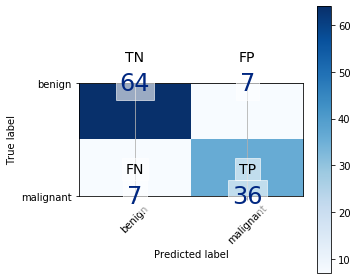

<Figure size 432x288 with 0 Axes>

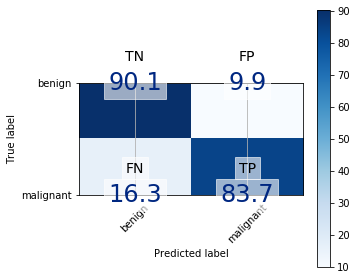

In [34]:
# Plot the confusion matrix for the decision tree
tree_cfn = confusion_matrix(target_actual, target_predict_tree)
tree_tn, tree_fn, tree_fp, tree_tp = confusion_matrix(target_actual, target_predict_tree).ravel()

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(tree_cfn, classes=class_names, 
                      normalize=False, figsize=figsize, fontsize=fontsize)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(tree_cfn, classes=class_names, 
                      normalize=True, figsize=figsize, fontsize=fontsize)

In [35]:
tr_acc = round((tree_tp + tree_tn) / X_test.shape[0], 3) * 100
print('Decision tree accuracy: {:.2f}%'.format(tr_acc))

Decision tree accuracy: 87.70%


In [36]:
tr_precision = round((tree_tp / (tree_tp + tree_fp)), 2) * 100
print('Decision tree precision: {:.2f}%'.format(tr_precision))

Decision tree precision: 84.00%


In [37]:
## Tune Decision Tree
num_leaves = [1, 5, 10, 20, 50, 100]
depths = np.arange(1, 21)
tree_params = {"max_depth": depths, "min_samples_leaf": num_leaves}

clf_tree = DecisionTreeClassifier(random_state=random_state)
tree_grid = GridSearchCV(clf_tree, tree_params, cv=cv);
tree_grid.fit(X_train, y_train);
tree_grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 1}

In [38]:
# Random forest 
clf_rf = RandomForestClassifier(random_state = 33, n_estimators=50, max_depth=5, 
                                min_samples_leaf=30, max_features=4)
clf_rf.fit(X_train, y_train)
pred_clf_rf = clf_rf.predict(X_test)
proba_clf_rf = clf_rf.predict_proba(X_test)

In [39]:
# Check probabilities - note this gives the probabilities associated with labels 0 and 1, respectively
print(proba_clf_rf)

[[0.30172098 0.69827902]
 [0.92885123 0.07114877]
 [0.8480448  0.1519552 ]
 [0.76593655 0.23406345]
 [0.88925713 0.11074287]
 [0.87488654 0.12511346]
 [0.91165383 0.08834617]
 [0.98446518 0.01553482]
 [0.75120264 0.24879736]
 [0.32657918 0.67342082]
 [0.64658757 0.35341243]
 [0.15316558 0.84683442]
 [0.90604072 0.09395928]
 [0.73512785 0.26487215]
 [0.85839275 0.14160725]
 [0.6154435  0.3845565 ]
 [0.80132582 0.19867418]
 [0.57036361 0.42963639]
 [0.81446945 0.18553055]
 [0.51106108 0.48893892]
 [0.637698   0.362302  ]
 [0.98688153 0.01311847]
 [0.95945848 0.04054152]
 [0.87306337 0.12693663]
 [0.20064308 0.79935692]
 [0.27005435 0.72994565]
 [0.31970645 0.68029355]
 [0.79286344 0.20713656]
 [0.73379451 0.26620549]
 [0.75643343 0.24356657]
 [0.76026805 0.23973195]
 [0.96244875 0.03755125]
 [0.44346123 0.55653877]
 [0.69652804 0.30347196]
 [0.98663404 0.01336596]
 [0.72887715 0.27112285]
 [0.65438476 0.34561524]
 [0.77612761 0.22387239]
 [0.76291725 0.23708275]
 [0.65468651 0.34531349]


In [40]:
target_predict_rf = np.where(proba_clf_rf[:,1] > thres, 1, 0)

Confusion matrix, without normalization
[[66  5]
 [13 30]]
Normalized confusion matrix
[[92.95774648  7.04225352]
 [30.23255814 69.76744186]]


<Figure size 432x288 with 0 Axes>

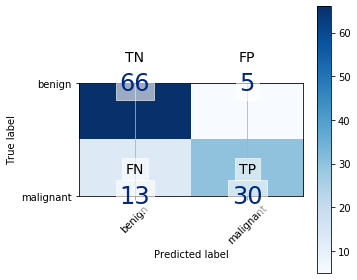

<Figure size 432x288 with 0 Axes>

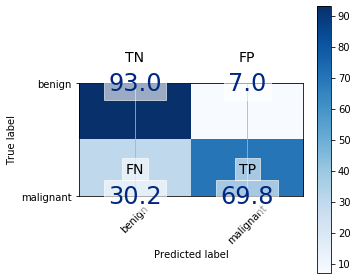

In [41]:
# Plot the confusion matrix for the random forest
rf_cfn = confusion_matrix(target_actual, target_predict_rf)
rf_tn, rf_fn, rf_fp, rf_tp = confusion_matrix(target_actual, target_predict_rf).ravel()

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(rf_cfn, classes=class_names, 
                      normalize=False, figsize=figsize, fontsize=fontsize)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(rf_cfn, classes=class_names, 
                      normalize=True, figsize=figsize, fontsize=fontsize)

In [42]:
rf_acc = round((rf_tp + rf_tn) / X_test.shape[0], 3) * 100
print('Random forest accuracy: {:.2f}%'.format(rf_acc))

Random forest accuracy: 84.20%


In [43]:
rf_precision = round((rf_tp / (rf_tp + rf_fp)), 2) * 100
print('Random forest precision: {:.2f}%'.format(rf_precision))

Random forest precision: 70.00%


In [44]:
## Tune Random Forest

clf_rf = RandomForestClassifier(random_state=random_state)


'''
Define the parameter grid for the. Random Forest:
- max_features: maximum number of features to split the tree nodes on
- n_estimators: number of trees to build
- max_depth: maximum number of layers in each tree

''' 
scoring = {'Accuracy' : make_scorer(accuracy_score), 'Precision': make_scorer(precision_score)}

params = {
    'max_features': [4,5],
    'n_estimators': [5,10],
    'max_depth': [1,10]
}

rf_grid = GridSearchCV(estimator = clf_rf, param_grid = params, scoring= scoring, n_jobs=3, 
                        iid=True, refit= 'Accuracy', cv=cv, verbose=0, pre_dispatch='2*n_jobs', 
                        error_score='raise', return_train_score='warn')


rf_grid.fit(X_train, y_train)
print(rf_grid.best_params_)


{'max_depth': 10, 'max_features': 4, 'n_estimators': 10}
{'mean_fit_time': array([0.00708933, 0.00313044, 0.00625606, 0.00937128, 0.01248379,
       0.01563478, 0.00312333, 0.01041055]), 'std_fit_time': array([7.15619717e-03, 6.26087189e-03, 7.66207608e-03, 7.65161927e-03,
       6.24191111e-03, 1.91335923e-05, 6.24666214e-03, 8.71620076e-03]), 'mean_score_time': array([0.00645666, 0.00313225, 0.00312262, 0.        , 0.        ,
       0.00313163, 0.00624204, 0.00059814]), 'std_score_time': array([0.00749282, 0.0062645 , 0.00624523, 0.        , 0.        ,
       0.00626326, 0.00764491, 0.00119629]), 'param_max_depth': masked_array(data=[1, 1, 1, 1, 10, 10, 10, 10],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_features': masked_array(data=[4, 4, 5, 5, 4, 4, 5, 5],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_

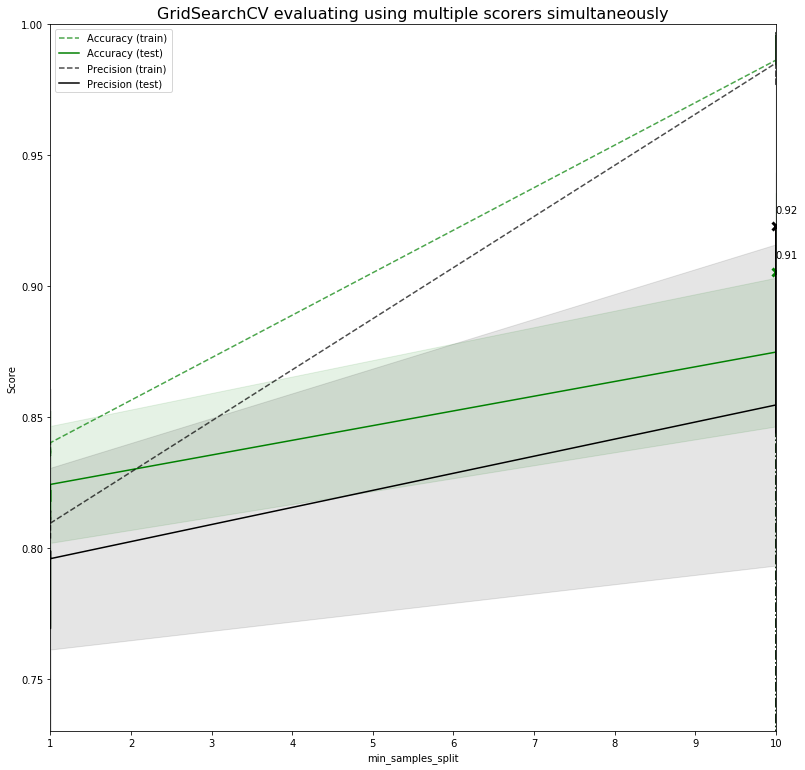

In [45]:
plot_performance(rf_grid.cv_results_)

In [48]:
# SVM 
clf_svm = SVC(kernel = 'linear', random_state = 33, probability = True)
clf_svm.fit(X_train, y_train)
pred_clf_svm = clf_svm.predict(X_test)
proba_clf_svm = clf_svm.predict_proba(X_test)
target_predict_svm = np.where(proba_clf_svm[:,1] > thres, 1, 0)

Confusion matrix, without normalization
[[70  1]
 [ 3 40]]
Normalized confusion matrix
[[98.5915493   1.4084507 ]
 [ 6.97674419 93.02325581]]


<Figure size 432x288 with 0 Axes>

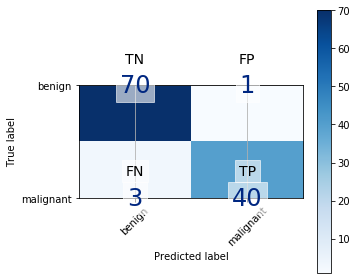

<Figure size 432x288 with 0 Axes>

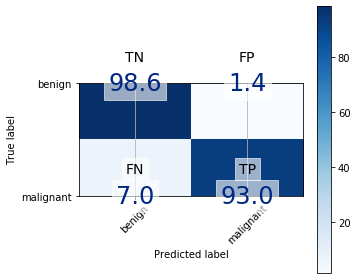

In [49]:
# Plot the confusion matrix for SVM
svm_cfn = confusion_matrix(target_actual, target_predict_svm)
svm_tn, svm_fn, svm_fp, svm_tp = confusion_matrix(target_actual, target_predict_svm).ravel()

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(svm_cfn, classes=class_names, 
                      normalize=False, figsize=figsize, fontsize=fontsize)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(svm_cfn, classes=class_names, 
                      normalize=True, figsize=figsize, fontsize=fontsize)

In [50]:
# SVM accuracy
svm_acc = round((svm_tp + svm_tn) / X_test.shape[0], 3) * 100
print('SVM accuracy: {:.2f}%'.format(svm_acc))

SVM accuracy: 96.50%


In [51]:
## Tune SVM

clf_svm = SVC(kernel = 'linear', random_state=random_state, probability = True)


'''
Define the parameter grid for the. Random Forest:
- max_features: maximum number of features to split the tree nodes on
- n_estimators: number of trees to build
- max_depth: maximum number of layers in each tree

''' 

params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ["linear", "rbf", "poly"],
}

svm_grid = GridSearchCV(estimator = clf_svm, param_grid = params, scoring=None, n_jobs=3, 
                        iid=True, refit=True, cv=cv, verbose=0, pre_dispatch='2*n_jobs', 
                        error_score='raise', return_train_score='warn');


svm_grid.fit(X_train, y_train);

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

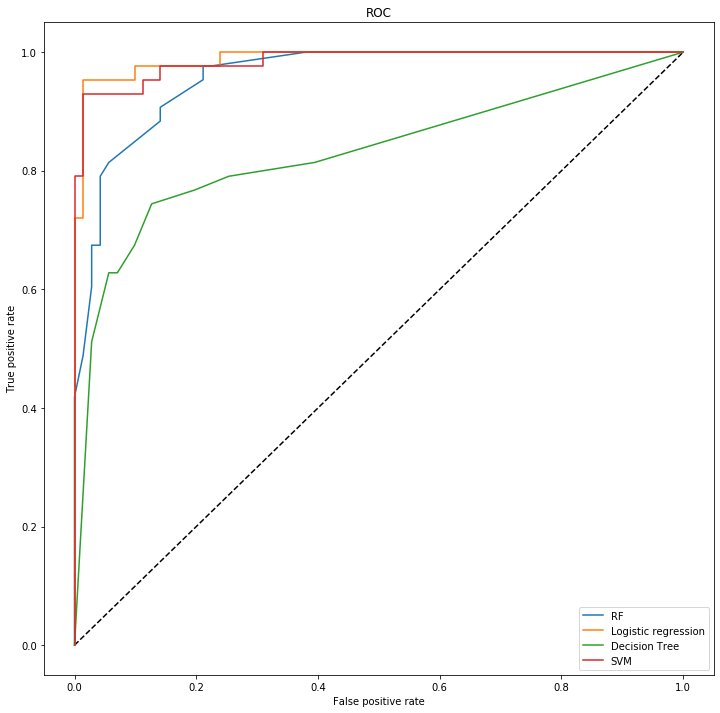

In [52]:
# Let's make the predictions and evaluate our model
rf_pred = rf_grid.predict_proba(X_test)[:, 1]
log_pred = log_grid.predict_proba(X_test)[:, 1]
tree_pred = tree_grid.predict_proba(X_test)[:, 1]
svm_pred = svm_grid.predict_proba(X_test)[:, 1]


# Let's get the false positive rate and the true positive rate, to build our ROC curve
fpr_rf, tpr_rf, _ = roc_curve(target_actual, rf_pred)
fpr_log, tpr_log, _ = roc_curve(target_actual, log_pred)
fpr_tree, tpr_tree, _ = roc_curve(target_actual, tree_pred)
fpr_svm, tpr_svm, _ = roc_curve(target_actual, svm_pred)


# Plot the ROC curve
fig = plt.figure(figsize=(12,12))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_log, tpr_log, label='Logistic regression')
plt.plot(fpr_tree, tpr_tree, label='Decision Tree')
plt.plot(fpr_svm, tpr_svm, label='SVM')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.legend(loc='best')
plt.show()

In [53]:
#  Let's have a look at each model's AUC - What do these indicate?

log_auc = auc(fpr_log, tpr_log)
tree_auc = auc(fpr_tree, tpr_tree)
rf_auc = auc(fpr_rf, tpr_rf)
svm_auc = auc(fpr_svm, tpr_svm)

print("------ AUC values for each model ------")
print()
print("Logistic regression: %.4f" %log_auc)
print("Decision Tree: %.4f" %tree_auc)
print("Random Forest: %.4f" %rf_auc)
print("SVM: %.4f" %svm_auc)

------ AUC values for each model ------

Logistic regression: 0.9889
Decision Tree: 0.8298
Random Forest: 0.9587
SVM: 0.9849
